In [1]:
!ls espnet/egs

aishell		dipco			 jvs			 ru_open_stt
aishell2	dirha_wsj		 li10			 swbd
ami		fisher_callhome_spanish  li42			 tedlium2
an4		fisher_swbd		 librispeech		 tedlium3
arctic		hkust			 libri_trans		 timit
aurora4		how2			 libritts		 tweb
babel		hub4_spanish		 ljspeech		 vais1000
blizzard17	iwslt16			 m_ailabs		 vcc20
chime4		iwslt18			 mboshi_french		 vivos
chime5		iwslt19			 mini_an4		 voxforge
cmu_wilderness	jesc			 must_c			 wsj
commonvoice	jnas			 polyphone_swiss_french  wsj_mix
csj		jsalt18e2e		 README.md		 yesno
csmsc		jsut			 reverb


In [2]:
!ls espnet/egs/voxforge

asr1


In [3]:
!tree -L 1 espnet/egs/voxforge/asr1

espnet/egs/voxforge/asr1
├── cmd.sh
├── conf
├── data
├── downloads
├── dump
├── exp
├── fbank
├── local
├── path.sh
├── RESULTS.md
├── run_rnnt.sh
├── run.sh
├── steps -> ../../../tools/kaldi/egs/wsj/s5/steps
├── utils -> ../../../tools/kaldi/egs/wsj/s5/utils
├── wget-log
└── wget-log.1

9 directories, 7 files


# Voxforge (it)

## (0-2) Download, DataPrep, MetaPrep

In [4]:
!cd espnet/egs/voxforge/asr1; ./run.sh --stop-stage 2 --lang it

stage -1: Data Download
--- Starting VoxForge data download (may take some time) ...
--2020-06-02 10:19:38--  http://www.repository.voxforge1.org/downloads/it/Trunk/Audio/Main/16kHz_16bit
Resolving www.repository.voxforge1.org (www.repository.voxforge1.org)... 74.208.236.70, 2607:f1c0:100f:f000::2f3
Connecting to www.repository.voxforge1.org (www.repository.voxforge1.org)|74.208.236.70|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.repository.voxforge1.org/downloads/it/Trunk/Audio/Main/16kHz_16bit/ [following]
--2020-06-02 10:19:38--  http://www.repository.voxforge1.org/downloads/it/Trunk/Audio/Main/16kHz_16bit/
Reusing existing connection to www.repository.voxforge1.org:80.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'downloads/it/tgz/16kHz_16bit.tmp'

16kHz_16bit.tmp         [     <=>            ] 159.56K   177KB/s    in 0.9s    

Last-modified header missing -- time-stamps turned off.

('AR4CAD-20130328-mma-it-0543',
 {'input': [{'feat': '/mnt/nvme0n1p5/Code/Intern/EspNet-Cheatsheet/espnet/egs/voxforge/asr1/dump/tr_it/deltafalse/feats.1.ark:511051',
    'name': 'input1',
    'shape': [748, 83]}],
  'lang': 'it',
  'output': [{'name': 'target1',
    'shape': [86, 38],
    'text': 'DI OTTO NAVI COMPRESA LA TUA FOLGORE E DI SEICENTO UOMINI FRA FILIBUSTIERI E BUCANIERI',
    'token': 'D I <space> O T T O <space> N A V I <space> C O M P R E S A <space> L A <space> T U A <space> F O L G O R E <space> E <space> D I <space> S E I C E N T O <space> U O M I N I <space> F R A <space> F I L I B U S T I E R I <space> E <space> B U C A N I E R I',
    'tokenid': '8 13 4 19 24 24 19 4 18 5 26 13 4 7 19 17 20 22 9 23 5 4 16 5 4 24 25 5 4 10 19 16 11 19 22 9 4 9 4 8 13 4 23 9 13 7 9 18 24 19 4 25 19 17 13 18 13 4 10 22 5 4 10 13 16 13 6 25 23 24 13 9 22 13 4 9 4 6 25 7 5 18 13 9 22 13'}],
  'utt2spk': 'AR4CAD'})

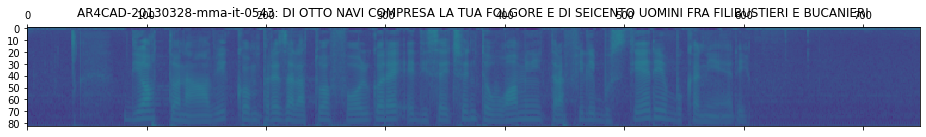

In [6]:
import json
import matplotlib.pyplot as plt
import kaldiio

# load 10-th speech/text in data.json
root = "espnet/egs/voxforge/asr1"
with open(root + "/dump/tr_it/deltafalse/data.json", "r") as f:
  test_json = json.load(f)["utts"]
  
key, info = list(test_json.items())[10]

# plot the speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

# print the key-value pair
key, info

## (3) NN Training

In [ ]:
!cd espnet/egs/voxforge/asr1; source ./path.sh; \
    ./run.sh --stage 3 --stop-stage 4 \
     --train-config $(change_yaml.py ./conf/train.yaml \
                      -a eunits=100 \
                      -a elayers=6 \
                      -a epochs=10 \
                      -a dunits=100 \
                      -a batch-size=16)

dictionary: data/lang_1char/tr_it_units.txt
stage 3: Network Training
stage 4: Decoding
average over ['exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.1', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.2', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.3', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.4', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.5', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.6', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.7', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.8', 'exp/tr_it_pytorch_train_eunits100_elayers6_epochs10_dunits100_batch-size16/results/snapshot.ep.9'